# Women's E-Commerce Clothing Reviews Explanatory Analysis
## by Lama AlDaej

## Investigation Overview

>In this investigation, I want to answer the below goal questions:
> 1. Does the E-commerce company satisfy its customers?
> 2. Which is the best clothing class, department, and division that have the highest rating reviews?
> 3. Which clothing class review do other customers find helpful/positive?
> 4. Which clothing classes are most likely to have high rating reviews? And do the customers find these reviews helpful/positive?

## Dataset Overview

> The dataset is about Women’s Clothing E-Commerce revolving around the reviews written by customers. Its nine supportive features offer a great environment to parse out the text through its multiple dimensions. Because this is real commercial data, it has been anonymized, and references to the company in the review text and body have been replaced with “retailer”. This dataset was downloaded from [nicapotato - Kaggle](https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews/version/1)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv', index_col=0)

## Cleaning Dataset

In [3]:
# Drop null rows
df = df.dropna()

# The Clothing ID column should be string using map(str) function
df['Clothing ID']= df['Clothing ID'].map(str)

## Key Insight #1 - Customer Satisfaction

> The company seems to satisfy their customers since they tend to write 5 rating reviews, 82% of them recommended the products, and the most frequent words in the reviews are positive.

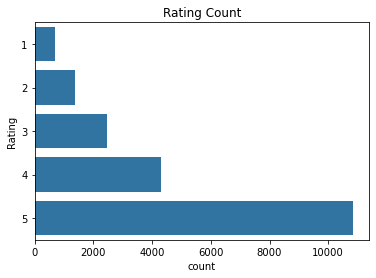

In [4]:
# Plot the Rating on a Horizontal bar chart

# The `color_palette()` returns the the current / default palette as a list of RGB tuples. 
# Each tuple consists of three digits specifying the red, green, and blue channel values to specify a color. 
# Choose the first tuple of RGB colors
base_color = sb.color_palette()[0]
rating_plt = sb.countplot(data = df, y = 'Rating', color= base_color);
rating_plt.set_title('Rating Count');

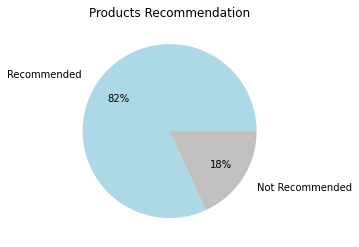

In [5]:
data = df['Recommended IND'].value_counts()
labels = ['Recommended' , 'Not Recommended']
colors = ['lightblue','silver']
# Show percentage position reference: https://stackoverflow.com/questions/21572870/matplotlib-percent-label-position-in-pie-chart
plt.pie(data, labels=labels, colors=colors, autopct='%1.0f%%', pctdistance=0.7, labeldistance=1.2)
plt.title('Products Recommendation')
plt.show()

In [6]:
# The wordcloud library is the one responsible for creating WorldClouds. 
# It can be a little tricky to install. 
# If you only need it for plotting a basic WordCloud, then running one of the commands below would be sufficient.
!pip install wordcloud

In [7]:
# Word cloud is a technique for visualising frequent words in a text where the size of the words represents their frequency.
# References: 
# - https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5
# - https://re-thought.com/creating-wordclouds-in-python/

# Import package
from wordcloud import WordCloud, STOPWORDS

# Create a text list of all words in column bloom.
text = " ".join(review for review in df['Review Text'].astype(str))

# Print how many words are in the text list that was just created from the Pandas column.
print ("There are {} words in the combination of all cells in column Review Text.".format(len(text)))

There are 6280923 words in the combination of all cells in column Review Text.


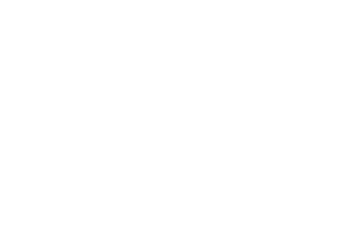

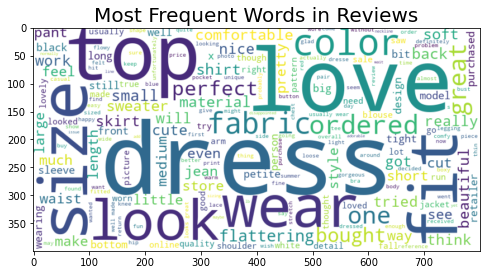

In [8]:
# Create a list of stop words
stopwords = set(STOPWORDS)

# Generate a WordCloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)

# It is time to display the WordCloud in the notebook using matplotlib.
plt.axis("off")
plt.figure(figsize=[8, 8])
plt.tight_layout()
# Use the argument interpolation="bilinear" to make the displayed image appear more smoothly.
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most Frequent Words in Reviews', fontsize=20);

plt.show()

## Key Insight #2 - Highest Rating Clothing Class, Department, and Division

> - The best clothing class that had the highest rating is 'Dresses'.
> - The best clothing department that had the highest rating is 'Tops'.
> - The best clothing division that had the highest rating is 'General'.

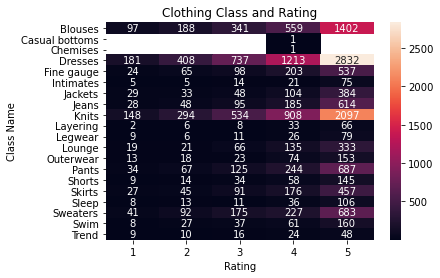

In [9]:
# Use group_by() and size() to get the number of classes and each combination of the two variable levels as a pandas Series
class_counts = df.groupby(['Class Name', 'Rating']).size()

# Use Series.reset_index() to convert a series into a dataframe object
class_counts = class_counts.reset_index(name='count')

# Use DataFrame.pivot() to rearrange the data, to have classes on rows
class_counts = class_counts.pivot(index = 'Class Name', columns = 'Rating', values = 'count')

# Set the fmt to '.0f' for classes that have no rating counts, in order to account for NaNs.
class_plt = sb.heatmap(class_counts, annot = True, fmt = '.0f');

# Change the y-axis labels rotation to make them readable
class_plt.set_yticklabels(class_plt.get_yticklabels(),rotation = 0);

# Set Title
class_plt.set_title('Clothing Class and Rating');

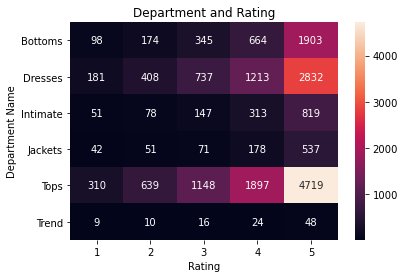

In [10]:
# Use group_by() and size() to get the number of departments and each combination of the two variable levels as a pandas Series
dp_counts = df.groupby(['Department Name', 'Rating']).size()

# Use Series.reset_index() to convert a series into a dataframe object
dp_counts = dp_counts.reset_index(name='count')

# Use DataFrame.pivot() to rearrange the data, to have departments on rows
dp_counts = dp_counts.pivot(index = 'Department Name', columns = 'Rating', values = 'count')

# Set the fmt to '.0f' for departments that have no rating counts, in order to account for NaNs.
dp_plt = sb.heatmap(dp_counts, annot = True, fmt = '.0f');

# Change the y-axis labels rotation to make them readable
dp_plt.set_yticklabels(dp_plt.get_yticklabels(),rotation = 0);

# Set Title
dp_plt.set_title('Department and Rating');

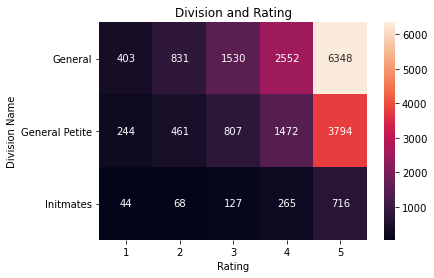

In [11]:
# Use group_by() and size() to get the number of divisions and each combination of the two variable levels as a pandas Series
dv_counts = df.groupby(['Division Name', 'Rating']).size()

# Use Series.reset_index() to convert a series into a dataframe object
dv_counts = dv_counts.reset_index(name='count')

# Use DataFrame.pivot() to rearrange the data, to have divisions class on rows
dv_counts = dv_counts.pivot(index = 'Division Name', columns = 'Rating', values = 'count')

# Set the fmt to '.0f' for divisions that have no rating counts, in order to account for NaNs.
dv_plt = sb.heatmap(dv_counts, annot = True, fmt = '.0f');

# Change the y-axis labels rotation to make them readable
dv_plt.set_yticklabels(dv_plt.get_yticklabels(),rotation = 0);

# Set Title
dv_plt.set_title('Division and Rating');

## Key Insight #3 - Positive and High-Rating Reviews 

> - Customers found that the dresses reviews were the most positive.
> - 'Intimates', 'Legwear', and 'Layering' clothing classes are most likely to have high rating reviews; however, other customers didn't find these reviews positive.> All of the findings are included in the presentation.

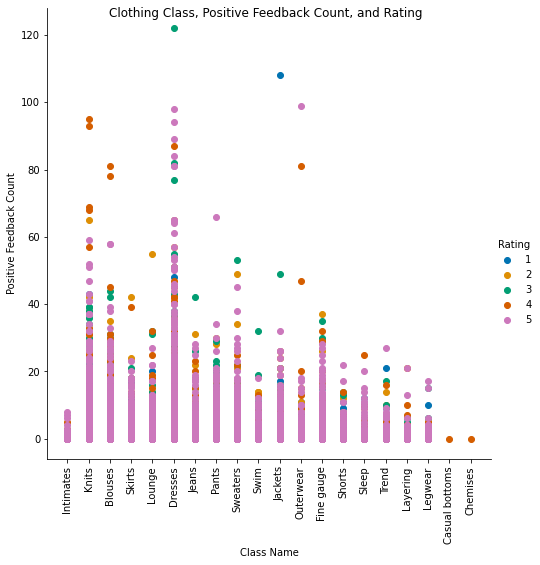

In [12]:
multi_plt = sb.FacetGrid(data = df, hue = 'Rating', height = 7, palette = 'colorblind')
multi_plt.map(plt.scatter, 'Class Name', 'Positive Feedback Count', alpha=True)
multi_plt.add_legend();

# Change the y-axis labels rotation to make them readable

for axes in multi_plt.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
    
# Set Title
multi_plt.fig.suptitle('Clothing Class, Positive Feedback Count, and Rating');

## Thank You!

In [ ]:
!jupyter nbconvert women_ecommerce_review_slide_deck.ipynb --to slides --post serve  --no-input --no-prompt